In [1]:
from imutils import paths
import numpy as np
import  argparse
import imutils
import cv2
import glob
import matplotlib.pyplot as plt


In [2]:
#reading images from folder
path=glob.glob("C:/Users/elmothda/PycharmProjects/image stitching using opencv/test images/*.jpg")
images=[]
for img in path:
    image=cv2.imread(img,1)
    images.append(image)
#cv2.imshow("images",image)
#cv2.waitKey()
#cv2.destroyAllWindows()

[array([[[  60,   60]],

       [[  60,  539]],

       [[1406,  539]],

       [[1406,   60]]], dtype=int32)]


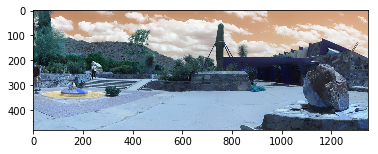

In [7]:
#iniltializing a stitcher object
stitcher = cv2.createstitcher() if imutils.is_cv3() else cv2.Stitcher_create() 
(status,stitched)=stitcher.stitch(images)
if status==0:
    stitched=cv2.copyMakeBorder(stitched,10,10,10,10,cv2.BORDER_CONSTANT,(0,0,0))
    gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
    #binary image of the panorama where white pixels (255) are the foreground and black pixels (0) are the background.
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
    #finding rectangular contour that keep max area of the image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    mask = np.zeros(thresh.shape, dtype="uint8")
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
    
    minRect = mask.copy()
    sub = mask.copy()
    
    #finding the smallest rectangular boundary
    while cv2.countNonZero(sub) > 0:
      minRect = cv2.erode(minRect, None)
      sub = cv2.subtract(minRect, thresh)
    
    if mask.any()!=minRect.any() : print("hii")
    #getting agian the smallest contour after resi
    cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print(cnts)
    c = max(cnts, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
    
    
    #cv2.rectangle(minRect, (x, y), (x + w, y + h), 255, -1)
    
    stitched = stitched[y:y + h, x:x + w]
    
    plt.imshow(stitched)
    #plt.show()
    #cv2.imwrite("output.png",stitched)
    #cv2.imshow("Stitched", stitched)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
else:
    print("image stitching failed")
    